In [55]:
import pandas as pd
from matplotlib import pyplot as plt

This binary classification problem is to predict whether the customer will pay the credit or not.
There is a baseline provided in the notebook. The dataset is taken from Open Machine Learning Course https://mlcourse.ai. The goal of this assignment is to test model building and evaluation skills. Feel free to improve the baseline model using different techinques. 

The expected time for this assignment is no more than 2 hours. Please send us your notebook with the solution.

### Baseline

In [61]:
data = pd.read_csv('credit_scoring_sample.csv')

<b>age	</b>	Customer age

<b>DebtRatio</b>  Total monthly loan payments (loan, alimony, etc.) / Total monthly income percentage

<b>NumberOfTime30-59DaysPastDueNotWorse</b> The number of cases when client has overdue 30-59 days (not worse) on other loans during the last 2 years

<b>NumberOfTimes90DaysLate</b>	Number of cases when customer had 90+dpd overdue on other credits

<b>NumberOfTime60-89DaysPastDueNotWorse</b> Number of cased when customer has 60-89dpd (not worse) during the last 2 years

<b>NumberOfDependents</b>	The number of customer dependents

<b>SeriousDlqin2yrs</b> 0 or 1	Customer hasn't paid the loan debt within 90 days

In [35]:
feature_names = ['age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfDependents']

In [31]:
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [33]:
X = data[feature_names]
y = data['SeriousDlqin2yrs']

Split the data on train and test set

In [73]:
from sklearn.model_selection import train_test_split

In [71]:
RANDOM_STATE = 17
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=RANDOM_STATE)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

As we have some missing values, we can fill them with predefined value

In [47]:
step_log_reg = ('log_reg', LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1))
step_imputer = ("imputer", SimpleImputer(strategy="mean"))

So pipeline consists of two step: first fill the missing values, second - train the logistic regrssion

In [48]:
from sklearn.pipeline import Pipeline

bl_estimator = Pipeline([
    step_imputer,
    step_log_reg
])

In [58]:
bl_estimator.fit(X_train, y_train)
bl_y_pred = bl_estimator.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1296: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Now the model can be verified on the test set. Print the classification report:

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, bl_y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        22
           1       1.00      0.12      0.22         8

   micro avg       0.77      0.77      0.77        30
   macro avg       0.88      0.56      0.54        30
weighted avg       0.82      0.77      0.69        30



In [59]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_test, bl_y_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_test, bl_y_pred)

Baseline: AUC_ROC = 0.665


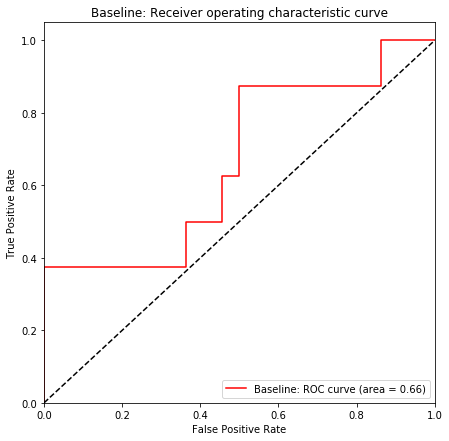

In [60]:
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "Baseline", color='r')
print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))